# Economic Data Analysis with Fred & Pandas

In [ ]:
!pip install fredapi > /dev/null

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time
import plotly.graph_objects as go

plt.style.use('fivethirtyeight')
pd.set_option('max_column', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred


hide fred_key

In [ ]:
fred_key = '2e547e4000884ce9c8645fbce13db9d0'

# 1. Create The Fred Object

In [ ]:
fred = Fred(api_key=fred_key)

# 2. Search for the Economic Data

In [ ]:
sp_search = fred.search('S&P', order_by='popularity')

In [ ]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-03-01,2023-03-01,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-02-28,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-03-01 08:55:12-06:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-03-01,2023-03-01,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-02-28 08:02:02-06:00,92,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-03-01,2023-03-01,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-02-28,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-03-01 08:55:16-06:00,84,This data represents the effective yield of th...
SP500,SP500,2023-03-01,2023-03-01,S&P 500,2013-03-01,2023-02-28,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-02-28 19:10:54-06:00,84,The observations for the S&P 500 represent the...
CSUSHPISA,CSUSHPISA,2023-03-01,2023-03-01,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-02-28 08:02:04-06:00,83,"For more information regarding the index, plea..."


# 3. Pull Raw Data & Plot

In [ ]:
#Test
sp500 = fred.get_series(series_id='SP500')

<AxesSubplot:title={'center':'S&P 500'}>

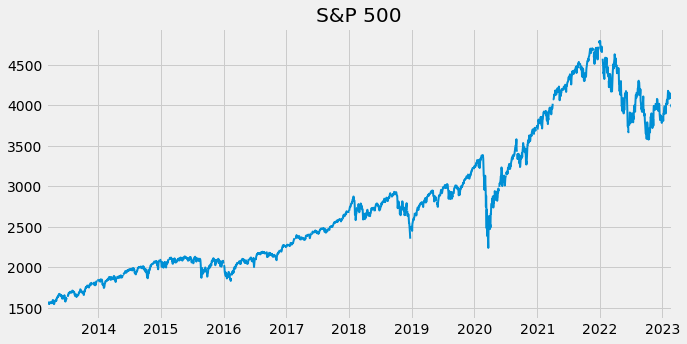

In [ ]:
sp500.plot(figsize=(10,5), title= 'S&P 500', lw=2)

# 4. Data Cleaning (All we need is Unemployment Rate by states)

In [ ]:
uemp_results = fred.search('unemployment')

In [ ]:
unrate = fred.get_series('UNRATE')

In [ ]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))

<AxesSubplot:>

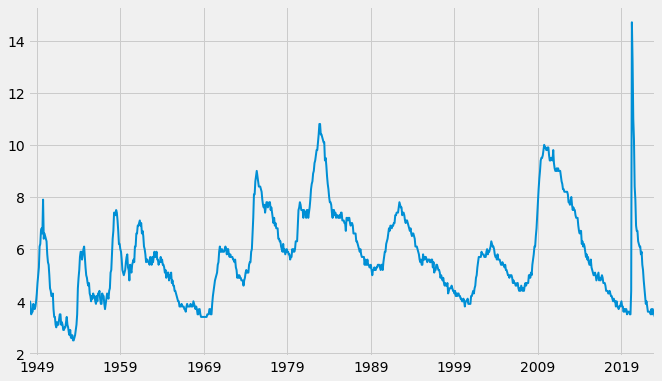

In [ ]:
unrate.plot(figsize = (10,6), lw=2)

In [ ]:
uemp_results.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-03-01,2023-03-01,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:02-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-03-01,2023-03-01,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-03 07:43:02-06:00,59,The unemployment rate represents the number of...
NROU,NROU,2023-03-01,2023-03-01,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,70,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2023-03-01,2023-03-01,Unemployment Level,1948-01-01,2023-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-02-03 07:44:05-06:00,70,The series comes from the 'Current Population ...
CCSA,CCSA,2023-03-01,2023-03-01,Continued Claims (Insured Unemployment),1967-01-07,2023-02-11,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-02-23 07:33:14-06:00,72,"Continued claims, also referred to as insured ..."


In [ ]:
# We need to filter title colum; only seasonal adjustment
unemp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-03-01,2023-03-01,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:02-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-03-01,2023-03-01,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-03 07:43:02-06:00,59,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2023-03-01,2023-03-01,Unemployment Level,1948-01-01,2023-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-02-03 07:44:05-06:00,70,The series comes from the 'Current Population ...
U6RATE,U6RATE,2023-03-01,2023-03-01,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:13-06:00,68,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2023-03-01,2023-03-01,Unemployment Rate - Black or African American,1972-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:12-06:00,66,The series comes from the 'Current Population ...


In [ ]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
#It reduces to 161 rows

In [ ]:
#clean more, need only the keyword 'Unemployment Rate'
## Using .lockc[[]] returns a DataFrame.
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [ ]:
#---------------------------------------
#unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
#unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
#unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
#---------------------------------------

In [ ]:
#Pull each data
len(unemp_df.index)

99

In [ ]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-03-01,2023-03-01,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:02-06:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-03-01,2023-03-01,Unemployment Rate - Black or African American,1972-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:12-06:00,66,The series comes from the 'Current Population ...
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-03-01,2023-03-01,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,56,Series Is Presented Here As Three Variables--(...
CAUR,CAUR,2023-03-01,2023-03-01,Unemployment Rate in California,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:27:02-06:00,58,None
M0892BUSM156SNBR,M0892BUSM156SNBR,2023-03-01,2023-03-01,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,20,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000089,LNS14000089,2023-03-01,2023-03-01,Unemployment Rate - 25-34 Yrs.,1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:34-06:00,7,The series comes from the 'Current Population ...
LNS14000093,LNS14000093,2023-03-01,2023-03-01,Unemployment Rate - 45-54 Yrs.,1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:45:51-06:00,7,The series comes from the 'Current Population ...
CSOUUR,CSOUUR,2023-03-01,2023-03-01,Unemployment Rate in South Census Region,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:23-06:00,7,None


In [ ]:
#all_results = pd.concat([fred.get_series(myid).to_frame(myid) for myid in unemp_df.index],axis=1)

all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
    

In [ ]:
#each of the value the list has 1 dataframe.
#e.g. 0 = UNRATE // 3 = CAUR = Califonia
all_results[3]

,CAUR
1976-01-01,9.2
1976-02-01,9.2
1976-03-01,9.1
1976-04-01,9.1
1976-05-01,9.0
...,...
2022-08-01,4.1
2022-09-01,3.8
2022-10-01,4.0
2022-11-01,4.1


In [ ]:
pd.concat(all_results, axis=1)
#However, there are weird names like XXXXX00000 (Actually, it was a name that not the states), we need to filter them out

,UNRATE,LNS14000006,M0892AUSM156SNBR,CAUR,M0892BUSM156SNBR,LNS14000031,U2RATE,TXUR,LNS14000002,FLUR,LNS14000024,NYUR,PAUR,LNS14000001,LNS14027662,LNS14000009,LNS14000003,LNS14027660,OHUR,ALUR,ILUR,MIUR,NCUR,KYUR,LRUN64TTUSM156S,COUR,MNUR,WIUR,GAUR,WAUR,VAUR,LNS14032183,NJUR,MAUR,MOUR,AKUR,LNS14027659,ARUR,TNUR,INUR,NMUR,WVUR,NVUR,SCUR,LNS14000012,AZUR,ORUR,LASMT261982000000003,OKUR,IAUR,LAUR,MDUR,UTUR,NDUR,PRUR,MTUR,MSUR,DCUR,LNS14024887,MEUR,KSUR,WYUR,NEUR,LNS14000060,NHUR,LASMT391746000000003,LNS14000018,HIUR,CTUR,SDUR,RIUR,LNS14000036,IDUR,LNS14000032,DEUR,LNS14000028,VTUR,LNS14024230,LNS14000061,LNS14027689,LNS14200000,LRUN24TTUSM156S,LRUNTTTTUSM156S,LRHUTTTTUSM156S,LNS14000029,CMWRUR,LNS14100000,CNERUR,LNS14000315,LNS14000048,LNS14000150,LNS14000062,LNS14000026,CNEWUR,LNS14000089,LNS14000093,CSOUUR,LNS14000025,USAURAMS
1929-04-01,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,3.5,5.9,NaN,3.8,NaN,5.8,1.5,4.0,3.4,2.5,3.2,4.3,4.1,3.6,1.8,3.9,3.1,3.7,4.0,2.6,4.5,4.1,3.6,3.8,3.564596,3.4,2.0,3.2,2.8,3.7,2.6,2.5,3.3,3.4,2.4,4.4,5.5,3.5,3.4,2.8,4.2,4.0,4.4,3.2,11.3,3.7,3.8,3.7,3.2,2.7,3.4,4.0,2.1,2.2,NaN,2.9,3.6,4.7,8.3,3.3,2.6,3.3,2.2,2.9,2.2,5.1,12.9,3.5,4.0,2.3,3.1,7.0,2.8,5.4,4.3,2.8,2.1,2.4,3.0,2.9,3.7,8.3,3.5,3.5,2.6,3.4,3.5,3.9,1.9,2.8,1.8,2.9,3.1,3.3,3.6,2.1,3.3,3.3,NaN
2022-10-01,3.7,5.9,NaN,4.0,NaN,5.3,1.6,4.0,3.7,2.7,3.4,4.3,4.0,3.7,1.9,4.2,3.3,3.9,4.2,2.7,4.6,4.2,3.8,3.9,3.710115,3.6,2.1,3.3,2.9,3.8,2.7,2.9,3.4,3.5,2.6,4.5,6.2,3.6,3.5,3.0,4.3,4.0,4.6,3.3,11.0,3.9,4.1,3.6,3.4,2.9,3.3,4.5,2.1,2.3,NaN,3.0,3.8,4.8,8.1,3.6,2.8,3.5,2.4,3.2,2.4,5.1,16.7,3.3,4.3,2.4,3.4,6.9,2.9,

In [ ]:
unemp_results = pd.concat(all_results, axis=1)

In [ ]:
#drops to column that have more than 4 chars
cols_to_drops = [] #keep data
for i in unemp_results:
    if len(i) >4:
        cols_to_drops.append(i)

unemp_results = unemp_results.drop(columns = cols_to_drops, axis=1)

In [ ]:
#weird names are cleanned
unemp_results.head()

,CAUR,TXUR,FLUR,NYUR,PAUR,OHUR,ALUR,ILUR,MIUR,NCUR,KYUR,COUR,MNUR,WIUR,GAUR,WAUR,VAUR,NJUR,MAUR,MOUR,AKUR,ARUR,TNUR,INUR,NMUR,WVUR,NVUR,SCUR,AZUR,ORUR,OKUR,IAUR,LAUR,MDUR,UTUR,NDUR,PRUR,MTUR,MSUR,DCUR,MEUR,KSUR,WYUR,NEUR,NHUR,HIUR,CTUR,SDUR,RIUR,IDUR,DEUR,VTUR
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Copy another Table
unemp_states = unemp_results.copy() #.drop('UNRATE', axis =1) as we need the data of the states
unemp_states = unemp_states.dropna()

In [ ]:
unemp_states.tail()

,California,Texas,Florida,New York,Pennsylvania,Ohio,Alabama,Illinois,Michigan,North Carolina,Kentucky,Colorado,Minnesota,Wisconsin,Georgia,Washington,Virginia,New Jersey,Massachusetts,Missouri,Alaska,Arkansas,Tennessee,Indiana,New Mexico,West Virginia,Nevada,South Carolina,Arizona,Oregon,Oklahoma,Iowa,Louisiana,Maryland,Utah,North Dakota,Puerto Rico,Montana,Mississippi,the District of Columbia,Maine,Kansas,Wyoming,Nebraska,New Hampshire,Hawaii,Connecticut,South Dakota,Rhode Island,Idaho,Delaware,Vermont
2022-04-01,4.6,4.3,3.0,4.5,4.8,4.0,2.8,4.6,4.3,3.4,3.9,3.6,2.2,2.8,3.1,4.1,3.0,4.1,4.1,3.4,4.8,3.2,3.2,2.2,5.3,3.6,5.0,3.3,3.2,3.7,2.7,3.0,4.1,4.2,1.9,2.8,6.4,2.3,4.1,5.8,3.3,2.4,3.3,1.9,2.3,4.1,4.4,2.3,3.2,2.6,4.5,2.5
2022-05-01,4.3,4.2,2.9,4.4,4.6,3.9,2.7,4.6,4.3,3.4,3.8,3.5,2.0,2.9,3.0,3.9,3.0,3.9,3.9,3.1,4.6,3.2,3.3,2.2,5.1,3.5,4.9,3.3,3.2,3.5,2.8,2.7,4.0,4.0,2.0,2.6,6.2,2.4,3.9,5.7,3.2,2.3,3.2,1.9,2.1,4.1,4.2,2.3,2.9,2.5,4.5,2.3
2022-06-01,4.2,4.1,2.8,4.4,4.5,3.9,2.6,4.5,4.3,3.4,3.7,3.4,1.8,2.9,2.9,3.8,2.8,3.9,3.7,2.8,4.6,3.2,3.3,2.4,4.9,3.6,4.7,3.2,3.3,3.5,2.9,2.6,3.8,4.0,2.0,2.5,6.1,2.6,3.8,5.5,3.0,2.4,3.1,1.9,2.0,4.2,4.0,2.3,2.7,2.5,4.5,2.2
2022-07-01,3.9,4.0,2.7,4.3,4.3,3.9,2.6,4.4,4.2,3.4,3.7,3.3,1.8,3.0,2.8,3.7,2.7,3.7,3.5,2.5,4.5,3.3,3.3,2.6,4.5,3.7,4.4,3.2,3.3,3.5,2.9,2.5,3.7,3.9,2.0,2.3,5.9,2.7,3.6,5.2,2.8,2.4,3.0,2.0,2.0,4.0,3.7,2.3,2.7,2.6,4.4,2.1
2022-08-01,4.1,4.1,2.7,4.7,4.2,4.0,2.6,4.5,4.1,3.5,3.8,3.4,1.9,3.1,2.8,3.7,2.6,4.0,3.6,2.5,4.6,3.4,3.4,2.8,4.4,3.9,4.4,3.1,3.5,3.7,3.1,2.6,3.5,4.3,2.0,2.3,5.8,2.8,3.6,5.1,3.1,2.5,3.1,2.1,2.0,4.0,4.1,2.3,2.8,2.7,4.5,2.1


In [ ]:
px.line(unemp_states)

In [ ]:
unemp_df
#We will change abbr by extracting it from title
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()

In [ ]:
id_to_state
#All Abbr. have change to its full name, not it's time too add those words on unemp_states

{'UNRATE': 'Unemployment Rate',
 'LNS14000006': 'Unemployment Rate - Black or African American',
 'M0892AUSM156SNBR': 'Unemployment Rate for United States',
 'CAUR': 'California',
 'M0892BUSM156SNBR': 'Unemployment Rate for United States',
 'LNS14000031': 'Unemployment Rate - 20 Yrs. & over, Black or African American Men',
 'U2RATE': 'Unemployment Rate - Job Losers (U-2)',
 'TXUR': 'Texas',
 'LNS14000002': 'Unemployment Rate - Women',
 'FLUR': 'Florida',
 'LNS14000024': 'Unemployment Rate - 20 Yrs. & over',
 'NYUR': 'New York',
 'PAUR': 'Pennsylvania',
 'LNS14000001': 'Unemployment Rate - Men',
 'LNS14027662': "Unemployment Rate - Bachelor's Degree and Higher, 25 Yrs. & over",
 'LNS14000009': 'Unemployment Rate - Hispanic or Latino',
 'LNS14000003': 'Unemployment Rate - White',
 'LNS14027660': 'Unemployment Rate - High School Graduates, No College, 25 Yrs. & over',
 'OHUR': 'Ohio',
 'ALUR': 'Alabama',
 'ILUR': 'Illinois',
 'MIUR': 'Michigan',
 'NCUR': 'North Carolina',
 'KYUR': 'Kentuc

In [ ]:
#loop those dicts to replace the All colums
unemp_states.columns

Index(['CAUR', 'TXUR', 'FLUR', 'NYUR', 'PAUR', 'OHUR', 'ALUR', 'ILUR', 'MIUR',
       'NCUR', 'KYUR', 'COUR', 'MNUR', 'WIUR', 'GAUR', 'WAUR', 'VAUR', 'NJUR',
       'MAUR', 'MOUR', 'AKUR', 'ARUR', 'TNUR', 'INUR', 'NMUR', 'WVUR', 'NVUR',
       'SCUR', 'AZUR', 'ORUR', 'OKUR', 'IAUR', 'LAUR', 'MDUR', 'UTUR', 'NDUR',
       'PRUR', 'MTUR', 'MSUR', 'DCUR', 'MEUR', 'KSUR', 'WYUR', 'NEUR', 'NHUR',
       'HIUR', 'CTUR', 'SDUR', 'RIUR', 'IDUR', 'DEUR', 'VTUR'],
      dtype='object')

In [ ]:
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [ ]:
unemp_states.columns
#Export to CSV to do the visualization in Tableau
#unemp_states.to_csv('unemp_states.csv')

Index(['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Ohio',
       'Alabama', 'Illinois', 'Michigan', 'North Carolina', 'Kentucky',
       'Colorado', 'Minnesota', 'Wisconsin', 'Georgia', 'Washington',
       'Virginia', 'New Jersey', 'Massachusetts', 'Missouri', 'Alaska',
       'Arkansas', 'Tennessee', 'Indiana', 'New Mexico', 'West Virginia',
       'Nevada', 'South Carolina', 'Arizona', 'Oregon', 'Oklahoma', 'Iowa',
       'Louisiana', 'Maryland', 'Utah', 'North Dakota', 'Puerto Rico',
       'Montana', 'Mississippi', 'the District of Columbia', 'Maine', 'Kansas',
       'Wyoming', 'Nebraska', 'New Hampshire', 'Hawaii', 'Connecticut',
       'South Dakota', 'Rhode Island', 'Idaho', 'Delaware', 'Vermont'],
      dtype='object')

In [ ]:
#Ta-Dah! #Plot Unployment Rate in Each State
px.line(unemp_states)

# Pull 2023 Unemployment Rate per State

In [ ]:
unemp_states.loc[unemp_states.index == '2022-01-01'].T.sort_values('2022-01-01', ascending=False) \
    .plot(kind='barch', figsize(8,12), width=0.7, edgecolor='Teal', title='Unemployment Rate by State, Jan 2022')

SyntaxError: SyntaxError: positional argument follows keyword argument

In [ ]:
test_plot = unemp_states.loc['2013-01-1':'2022-12-01']

In [ ]:
px.line(test_plot)